# Extract Keyword list

In [2]:
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import sys
sys.path.append('../../src')
from DataHandler import DataHandler

In [4]:
dataHandler = DataHandler("../config.yaml")

In [5]:
df_aimeta = dataHandler.load_data("data_files.raw_data.df_aimeta")
df_aimeta.head(3)

📂 Lade: OPAL_ai_meta.p
   ✅ Geladen: 4,548 Zeilen × 25 Spalten


,pipe:ID,pipe:file_type,ai:author,ai:revisedAuthor,ai:affilation,ai:title,ai:type,ai:keywords_ext,ai:keywords_gen,ai:keywords_dnb,...,ai:keywords_dnb_ids,ai:keywords_ext_ids_valid,ai:keywords_ext_valid_ratio,ai:keywords_dnb_ids_valid,ai:keywords_dnb_valid_ratio,ai:keywords_gen_ids_valid,ai:keywords_gen_valid_ratio,all_ddc_valid_ids,ddc_valid_count,valid_ddc_keywords
0,8I6sM5zapD60,pdf,"Stephan Gerhold, Marcel Beyer",[Vorname='Stephan' Familienname='Gerhold' Tite...,,Übung 3 Photogrammetrie,Aufgabenblatt,"Passpunkte, digitale Entzerrung, Photogrammetr...","Photogrammetrie, digitale Entzerrung, Resampli...","Photogrammetrie, Bildverarbeitung, Digitale En...",...,"[0, 1, 2, 15905, 9, 11, 12, 14]","[0, 1, 4, 12, 14, 15996, 9309]",0.583333,"[0, 1, 11, 12, 14]",0.625000,"[0, 1, 4, 11, 12, 14, 15996]",0.636364,"[0, 1, 4, 12, 14, 15996, 9309, 0, 1, 11, 12, 1...",19,"[Photogrammetrie, digitale Entzerrung, Paralle..."
1,8ZICOHBmAHyQ,pdf,Keine Angabe.,[],,3.1 Grundlagen der Tragwerke,Skript,"Tragwerke, Lagerreaktionen, Gleichgewichtsbedi...","Tragwerke, statische Bestimmtheit, Lagerreakti...","Statik, Tragwerke, Mechanik, Festigkeitslehre,...",...,"[10180, 40, 41, 43, 46, 51, 25, 26, 27, 28, 30]","[33, 34, 36, 25, 30]",0.384615,"[40, 41, 43, 46, 51, 25, 30]",0.636364,"[33, 34, 36, 31054, 25, 3835]",0.545455,"[33, 34, 36, 25, 30, 40, 41, 43, 46, 51, 25, 3...",18,"[Freiheitsgrade, Gelenke, Lasten, Tragwerke, F..."
2,8Lfz8SAKa6k0,pdf,Robert Ringel,[Vorname='Robert' Familienname='Ringel' Titel=''],,Gedanken und Notizen zu unserem Mini-KI-Worksh...,Protokoll,"KI-Systeme, Automatisierung, Industrie, Arbeit...","Künstliche Intelligenz, Automatisierung, Indus...","Künstliche Intelligenz, Automatisierung, Indus...",...,"[65, 67, 70, 71, 72, 73, 52, 53, 3706, 3708, 62]","[96, 65, 3717, 7820, 52, 53, 54, 55, 3706, 58,...",0.866667,"[65, 67, 70, 71, 72, 73, 52, 53, 3706, 3708, 62]",1.000000,"[96, 65, 6211, 58, 7820, 52, 53, 56, 3706, 60,...",0.733333,"[96, 65, 3717, 7820, 52, 53, 54, 55, 3706, 58,...",35,"[wissenschaftliche Arbeit, Lernprozesse, KI-Sy..."


In [6]:
df_keywords = dataHandler.load_data("data_files.processed_data.keywords.df_keywordlist")
df_keywords.head(3)

📂 Lade: keyword_list.p
   ✅ Geladen: 43,289 Zeilen × 10 Spalten


,raw_keyword,lemma,is_gnd,gnd_link,sameAs_link,ddc_D3,perferedNames,totalItems,count,ddc_D2
0,Photogrammetrie,Photogrammetrie,True,https://d-nb.info/gnd/4184798-2,http://www.wikidata.org/entity/Q15850396,http://dewey.info/class/526.9825/,"['Terrestrische Fotogrammetrie', 'Fotogrammetr...",2.0,25,NaN
1,digitale Entzerrung,,True,https://d-nb.info/gnd/4395561-7,NaN,NaN,['Orthoprojektion'],1.0,2,NaN
2,Resamplingmethoden,Resamplingmethoden,False,NaN,NaN,NaN,NaN,NaN,2,NaN


## Preprocessing

Extrahiere die DDC IDs aus den URLs

In [11]:
df_keywords

,raw_keyword,lemma,is_gnd,gnd_link,sameAs_link,ddc_D3,perferedNames,totalItems,count,ddc_D2,ddc_D3_number,ddc_D2_number,ddc_numbers,ddc_label
0,Photogrammetrie,Photogrammetrie,True,https://d-nb.info/gnd/4184798-2,http://www.wikidata.org/entity/Q15850396,http://dewey.info/class/526.9825/,"['Terrestrische Fotogrammetrie', 'Fotogrammetr...",2.0,25,NaN,526.9825,None,[526.9825],[Photogrammetrie (526.9825)]
1,digitale Entzerrung,,True,https://d-nb.info/gnd/4395561-7,NaN,NaN,['Orthoprojektion'],1.0,2,NaN,None,None,[],[]
2,Resamplingmethoden,Resamplingmethoden,False,NaN,NaN,NaN,NaN,NaN,2,NaN,None,None,[],[]
3,Passpunkte,Passpunkte,False,NaN,NaN,NaN,NaN,NaN,9,NaN,None,None,[],[]
4,Parallelprojektion,Parallelprojektion,True,https://d-nb.info/gnd/4325184-5,NaN,NaN,"['Parallelprojektion', 'Orthogonale Parallelpr...",6.0,13,NaN,None,None,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43284,Versicherungen,Versicherung,True,https://d-nb.info/gnd/4063173-4,http://www.wikidata.org/entity/Q43183,http://dewey.info/class/368/,"['Versicherung', 'Aktuar <Versicherung>', 'Fre...",328.0,1,NaN,368,None,[368],[Versicherungen (368)]
43285,Beiträge,Beitrag,True,https://d-nb.info/gnd/4133743-8,http://www.wikidata.org/entity/Q1992300,NaN,"['Beitrag', 'Beitrag <Gesellschaftsrecht>', 'G...",49.0,1,NaN,None,None,[],[]
43286,Werbekosten,Werbekost,True,https://d-nb.info/gnd/4189640-3,NaN,NaN,['Werbekosten'],1.0,1,NaN,None,None,[],[]
43287,Reisekosten,Reisekosten,True,https://d-nb.info/gnd/4049298-9,http://www.wikidata.org/entity/Q831181,NaN,"['Reisekosten', 'Reisekosten classic', 'PC Rei...",12.0,1,http://dewey.info/class/1--0681/,None,None,[],[]


In [ ]:
# DDC-Nummern Extraktion und Validierung (aktualisiert für neue Datenstruktur)
def extract_and_validate_ddc(ddc_url):
    """
    Extrahiert und validiert DDC-Nummer aus einer URL.
    Gibt None zurück falls URL ungültig oder DDC-Nummer nicht korrekt formatiert ist.
    """
    if pd.isna(ddc_url):
        return None
    
    try:
        # Extrahiere DDC-Nummer aus URL (5. Element nach Split)
        ddc_number = ddc_url.split("/")[4]
        
        # Validiere Format: nur Ziffern und Punkte erlaubt
        if all(c.isdigit() or c == '.' for c in ddc_number):
            return ddc_number
        else:
            return None
    except (IndexError, AttributeError):
        return None

# Anwendung der optimierten Funktion auf beide DDC-Spalten
print("Extrahiere und validiere DDC-Nummern...")

# ANGEPASST: Neue Spaltennamen verwenden (ddc_3_url, ddc_2_url statt ddc_D3, ddc_D2)
# Die neuen Daten haben separate URL-Spalten und extrahierte Nummer-Spalten
if 'ddc_3_url' in df_keywords.columns and 'ddc_2_url' in df_keywords.columns:
    # Neue Struktur: Verwende die URL-Spalten zum Extrahieren
    df_keywords['ddc_3_number'] = df_keywords['ddc_3_url'].apply(extract_and_validate_ddc)
    df_keywords['ddc_2_number'] = df_keywords['ddc_2_url'].apply(extract_and_validate_ddc)
    
    # Kombiniere DDC-Nummern in einer Liste
    df_keywords['ddc_numbers'] = df_keywords[['ddc_3_number', 'ddc_2_number']].apply(
        lambda row: [num for num in row if pd.notna(num)], axis=1
    )
else:
    # Alte Struktur: Fallback auf alte Spaltennamen
    df_keywords['ddc_3_number'] = df_keywords['ddc_D3'].apply(extract_and_validate_ddc) if 'ddc_D3' in df_keywords.columns else None
    df_keywords['ddc_2_number'] = df_keywords['ddc_D2'].apply(extract_and_validate_ddc) if 'ddc_D2' in df_keywords.columns else None
    
    # Kombiniere DDC-Nummern in einer Liste
    df_keywords['ddc_numbers'] = df_keywords[['ddc_3_number', 'ddc_2_number']].apply(
        lambda row: [num for num in row if pd.notna(num)], axis=1
    )

# Erstelle Labels mit Keywords und DDC-Nummern
df_keywords['ddc_label'] = df_keywords.apply(
    lambda row: [f"{row['raw_keyword']} ({num})" for num in row['ddc_numbers']], axis=1
)

print(f"DDC-Verarbeitung abgeschlossen. {len(df_keywords)} Keywords verarbeitet.")

# Zeige Ergebnisse für GND-validierte Keywords
# ANGEPASST: Verwende 'preferredNames' statt 'perferedNames' falls vorhanden
preferred_col = 'preferredNames' if 'preferredNames' in df_keywords.columns else 'perferedNames'
ddc_2_col = 'ddc_2_number' if 'ddc_2_number' in df_keywords.columns else 'ddc_D2_number'
ddc_3_col = 'ddc_3_number' if 'ddc_3_number' in df_keywords.columns else 'ddc_D3_number'
ddc_2_url_col = 'ddc_2_url' if 'ddc_2_url' in df_keywords.columns else 'ddc_D2'
ddc_3_url_col = 'ddc_3_url' if 'ddc_3_url' in df_keywords.columns else 'ddc_D3'

df_keywords[df_keywords.is_gnd==True]\
    [['raw_keyword', preferred_col, ddc_2_url_col, ddc_2_col, ddc_3_url_col, 
      ddc_3_col, 'ddc_numbers', 'ddc_label']].head(5)

In [ ]:
# Wie viele Zeilen hat df_keywords?
print(f"Anzahl der Zeilen in df_keywords: {len(df_keywords)}")
# Wie viele Einträge haben ddc_2_number und/oder ddc_3_number? Wie viele haben gar keinen DDC Wert?

# ANGEPASST: Verwende neue Spaltennamen falls vorhanden
ddc_2_col = 'ddc_2_number' if 'ddc_2_number' in df_keywords.columns else 'ddc_D2_number'
ddc_3_col = 'ddc_3_number' if 'ddc_3_number' in df_keywords.columns else 'ddc_D3_number'

ddc_d2_count = df_keywords[ddc_2_col].notna().sum()
ddc_d3_count = df_keywords[ddc_3_col].notna().sum()
ddc_both_count = df_keywords['ddc_numbers'].apply(lambda x: len(x) > 0).sum()
ddc_none_count = df_keywords['ddc_numbers'].apply(lambda x: len(x) == 0).sum()

print("=== DDC ZÄHLEN ===")
print(f"Einträge mit DDC D2: {ddc_d2_count}")
print(f"Einträge mit DDC D3: {ddc_d3_count}")
print(f"Einträge mit beiden DDCs: {ddc_both_count}")
print(f"Einträge ohne DDC: {ddc_none_count}")



### df_aimeta - Analyse der DDC-Nummern

Sind diese als gültig in der Keyword-List enthalten?

In [ ]:
# Keyword-Validierung und GND-Mapping
# Diese Zelle führt eine Validierung der extrahierten Keywords durch
# und erstellt Mappings zu GND-validierten Referenzen

# Schritt 1: Erstelle Mapping von Keywords zu IDs im df_keywords
print("Erstelle Keyword-zu-ID Mapping...")
keyword_to_id = {}

# ANGEPASST: Verwende normalized_keyword falls vorhanden, sonst raw_keyword in Kleinbuchstaben
use_normalized = 'normalized_keyword' in df_keywords.columns

for idx, row in df_keywords.iterrows():
    if pd.notna(row['raw_keyword']):
        # Verwende normalized_keyword wenn verfügbar, sonst konvertiere raw_keyword
        if use_normalized and pd.notna(row.get('normalized_keyword')):
            keyword = str(row['normalized_keyword']).strip().lower()
        else:
            keyword = str(row['raw_keyword']).strip().lower()
        
        if keyword not in keyword_to_id:
            keyword_to_id[keyword] = []
        keyword_to_id[keyword].append(idx)

print(f"Keyword-Mapping erstellt: {len(keyword_to_id)} eindeutige Keywords")

# Schritt 2: Konvertiere Keyword-Strings zu ID-Listen
def parse_keywords_to_ids(keyword_string):
    """Konvertiert einen Keyword-String zu einer Liste von IDs"""
    if pd.isna(keyword_string) or keyword_string == "":
        return []
    
    # Teile Keywords auf (kommagetrennt)
    keywords = [k.strip().lower() for k in str(keyword_string).split(',')]
    ids = []
    
    for keyword in keywords:
        if keyword in keyword_to_id:
            ids.extend(keyword_to_id[keyword])
    
    return list(set(ids))  # Entferne Duplikate

# Erstelle _ids Spalten aus den Keyword-Strings
print("Konvertiere Keywords zu IDs...")
for keyword_type in ['ext', 'gen', 'dnb']:
    df_aimeta[f'ai:keywords_{keyword_type}_ids'] = df_aimeta[f'ai:keywords_{keyword_type}'].apply(parse_keywords_to_ids)

print("Keyword-zu-ID Konvertierung abgeschlossen")

# Schritt 3: Initialisierung der Validierungs-Spalten
for keyword_type in ['ext', 'dnb', 'gen']:
    if f'ai:keywords_{keyword_type}_ids_valid' not in df_aimeta.columns:
        df_aimeta[f'ai:keywords_{keyword_type}_ids_valid'] = [[] for _ in range(len(df_aimeta))]
    if f'ai:keywords_{keyword_type}_valid_ratio' not in df_aimeta.columns:
        df_aimeta[f'ai:keywords_{keyword_type}_valid_ratio'] = 0.0

# Schritt 4: Keyword-Validierung durch GND-Mapping
print("Starte GND-Validierung...")

# ANGEPASST: Verwende 'preferredNames' oder 'gnd_preferred_name' falls vorhanden
preferred_col = None
if 'preferredNames' in df_keywords.columns:
    preferred_col = 'preferredNames'
elif 'perferedNames' in df_keywords.columns:
    preferred_col = 'perferedNames'
elif 'gnd_preferred_name' in df_keywords.columns:
    preferred_col = 'gnd_preferred_name'

for index, row in tqdm(df_aimeta.iterrows(), total=len(df_aimeta), desc="Validiere Keywords"):
    for keyword_type in ['ext', 'dnb', 'gen']:
        keyword_ids = row[f'ai:keywords_{keyword_type}_ids']
        valid_ids = []
        
        # Prüfe jeden Keyword-Index auf GND-Validierung
        for keyword_id in keyword_ids:
            if keyword_id < len(df_keywords):
                keyword_row = df_keywords.iloc[keyword_id]
                
                # Validierung basierend auf GND-Status und Preferred Names
                is_valid = keyword_row['is_gnd'] == True
                
                # Prüfe ob preferred names vorhanden sind
                if is_valid and preferred_col:
                    pref_value = keyword_row[preferred_col]
                    is_valid = pd.notna(pref_value) and len(str(pref_value).strip()) > 0
                
                if is_valid:
                    valid_ids.append(keyword_id)
        
        # Speichere validierte IDs und berechne Ratio
        df_aimeta.at[index, f'ai:keywords_{keyword_type}_ids_valid'] = valid_ids
        
        # Berechne Validierungs-Ratio
        total_keywords = len(keyword_ids)
        valid_keywords = len(valid_ids)
        ratio = valid_keywords / total_keywords if total_keywords > 0 else 0.0
        df_aimeta.at[index, f'ai:keywords_{keyword_type}_valid_ratio'] = ratio

# Schritt 5: Zusammenführung aller validierten DDC-Keywords
df_aimeta['all_ddc_valid_ids'] = df_aimeta['ai:keywords_ext_ids_valid'] + df_aimeta['ai:keywords_dnb_ids_valid'] + df_aimeta['ai:keywords_gen_ids_valid']

# Anzahl der validierten Keywords zählen
df_aimeta['ddc_valid_count'] = df_aimeta['all_ddc_valid_ids'].apply(lambda x: len(x))

print("Validierung abgeschlossen!")

# Ausgabe der Ergebnisse
df_aimeta[['pipe:ID',
       'ai:keywords_ext_ids_valid', 'ai:keywords_ext_valid_ratio',
       'ai:keywords_dnb_ids_valid', 'ai:keywords_dnb_valid_ratio',
       'ai:keywords_gen_ids_valid', 'ai:keywords_gen_valid_ratio', 
       "all_ddc_valid_ids", "ddc_valid_count"]].head(3)

In [ ]:
# Füge df_aimeta die gültigen Keywords aus df_keywords hinzu
df_aimeta['valid_ddc_keywords'] = df_aimeta['all_ddc_valid_ids'].apply(
    lambda ids: [df_keywords.iloc[i]['raw_keyword'] for i in ids if i < len(df_keywords)]
)

# Zeige die ersten 3 Zeilen des aktualisierten DataFrames
df_aimeta[['pipe:ID', 'valid_ddc_keywords']].head(3)

,pipe:ID,valid_ddc_keywords,valid_ddc_numbers
0,8I6sM5zapD60,"[Photogrammetrie, digitale Entzerrung, Paralle...","[[526.9825], [], [], [511.42], [], [912.0148],..."
1,8ZICOHBmAHyQ,"[Freiheitsgrade, Gelenke, Lasten, Tragwerke, F...","[[], [618.92722], [624.172], [624.17723], [620..."
2,8Lfz8SAKa6k0,"[wissenschaftliche Arbeit, Lernprozesse, KI-Sy...","[[], [153.15], [133.59252], [], [], [338.09], ..."


In [19]:
# speichere den aktualisierten DataFrame
dataHandler.save_data(df_aimeta, "data_files.raw_data.df_aimeta")

💾 Datei gespeichert: OPAL_ai_meta.p
   📁 Pfad: /media/sz/Data/Connected_Lecturers/Opal/raw/OPAL_ai_meta.p
   📊 DataFrame: 4,548 Zeilen × 25 Spalten
   📏 Dateigröße: 9.2 MB
   🕐 Zeitstempel: 2025-07-29 11:33:30
   ⏱️  Speicherdauer: 0.13 Sekunden


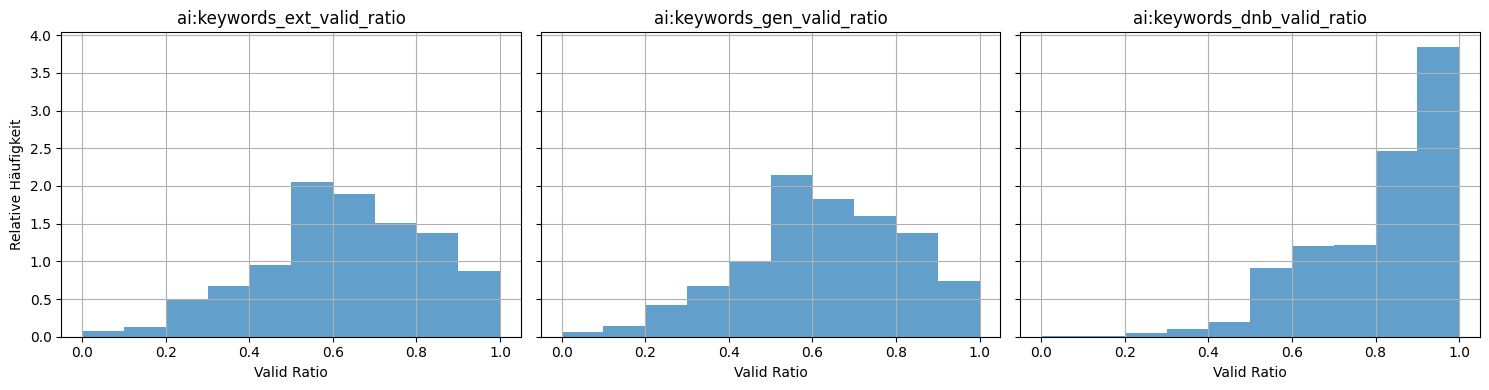

In [20]:
# Liste der Spalten für die Histogramme
columns_to_plot = [
    'ai:keywords_ext_valid_ratio',
    'ai:keywords_gen_valid_ratio', 
    'ai:keywords_dnb_valid_ratio'
]

# Erstelle Subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Erstelle Histogramme mit relativen Häufigkeiten
for i, column in enumerate(columns_to_plot):
    df_aimeta[column].hist(ax=axes[i], bins=10, density=True, alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_ylabel('Relative Häufigkeit' if i == 0 else '')
    axes[i].set_xlabel('Valid Ratio')

plt.tight_layout()
plt.savefig("valid_ratio_histograms.png")
plt.show()

In [ ]:
# Erstelle neuen DataFrame mit DDC Labels als Integer-Werte für alle df_aimeta Materialien

def extract_ddc_numbers_as_int(keyword_ids, df_keywords, ddc_column):
    """
    Extrahiert DDC-Nummern als Integer-Werte für eine Liste von Keyword-IDs
    Behält Duplikate bei, falls sie auftreten
    
    ANGEPASST: Unterstützt sowohl alte (ddc_D2_number) als auch neue (ddc_2_number) Spaltennamen
    """
    ddc_numbers = []  # Verwende Liste statt Set, um Duplikate zu behalten
    
    for keyword_id in keyword_ids:
        if keyword_id < len(df_keywords):
            keyword_row = df_keywords.iloc[keyword_id]
            ddc_value = keyword_row[ddc_column]
            
            if pd.notna(ddc_value):
                try:
                    # Konvertiere DDC-Nummer zu Integer (Hauptklasse)
                    ddc_int = int(float(str(ddc_value).split('.')[0]))
                    ddc_numbers.append(ddc_int)  # Füge hinzu ohne Duplikat-Prüfung
                except (ValueError, AttributeError, IndexError):
                    continue
    
    return ddc_numbers

print("Erstelle DataFrame mit DDC Labels als Integer-Werte...")

# ANGEPASST: Bestimme welche Spaltennamen verwendet werden
ddc_2_col = 'ddc_2_number' if 'ddc_2_number' in df_keywords.columns else 'ddc_D2_number'
ddc_3_col = 'ddc_3_number' if 'ddc_3_number' in df_keywords.columns else 'ddc_D3_number'

# Initialisiere Listen für den neuen DataFrame
material_ids = []
ddc_d2_lists = []
ddc_d3_lists = []
ddc_d2_unique_counts = []
ddc_d3_unique_counts = []
ddc_combined_lists = []

# Verarbeite jedes Material in df_aimeta
for index, row in tqdm(df_aimeta.iterrows(), total=len(df_aimeta), desc="Verarbeite Materialien"):
    material_id = row['pipe:ID']
    material_ids.append(material_id)
    
    # Sammle alle Keyword-IDs für dieses Material
    all_keyword_ids = []
    for keyword_type in ['ext', 'gen', 'dnb']:
        keyword_ids = row[f'ai:keywords_{keyword_type}_ids']
        all_keyword_ids.extend(keyword_ids)
    
    # Entferne Duplikate aus Keyword-IDs (aber behalte DDC-Duplikate)
    all_keyword_ids = list(set(all_keyword_ids))
    
    # Extrahiere DDC_D2 Nummern als Integer (mit angepassten Spaltennamen)
    ddc_d2_ints = extract_ddc_numbers_as_int(all_keyword_ids, df_keywords, ddc_2_col)
    ddc_d2_lists.append(ddc_d2_ints)
    ddc_d2_unique_counts.append(len(ddc_d2_ints))
    
    # Extrahiere DDC_D3 Nummern als Integer (mit angepassten Spaltennamen)
    ddc_d3_ints = extract_ddc_numbers_as_int(all_keyword_ids, df_keywords, ddc_3_col)
    ddc_d3_lists.append(ddc_d3_ints)
    ddc_d3_unique_counts.append(len(ddc_d3_ints))
    
    # Kombiniere beide Listen (behalte alle Duplikate)
    combined_ddcs = ddc_d2_ints + ddc_d3_ints
    ddc_combined_lists.append(combined_ddcs)

# Erstelle neuen DataFrame
df_ddc = pd.DataFrame({
    'pipe:ID': material_ids,
    'ddc_d2_label': ddc_d2_lists,
    'ddc_d3_label': ddc_d3_lists,
    'ddc_combined_label': ddc_combined_lists,
    'ddc_d2_count': ddc_d2_unique_counts,
    'ddc_d3_count': ddc_d3_unique_counts,
    'ddc_total_count': [len(combined) for combined in ddc_combined_lists]
})

print(f"DataFrame erstellt mit {len(df_ddc)} Materialien")

df_ddc.head(3)

In [22]:
dataHandler.save_data(df_ddc, "data_files.processed_data.keywords.df_ddc")

print(f"📊 Gespeicherte Daten: {len(df_ddc)} Materialien mit DDC-Klassifikationen")
print(f"📋 Spalten: {list(df_ddc.columns)}")

ddc_file_path = dataHandler.config_manager.get("data_files.processed_data.keywords.df_ddc")
if Path(ddc_file_path).exists():
    file_size_kb = os.path.getsize(ddc_file_path) / 1024
    print(f"📁 Dateigröße: {file_size_kb:.1f} KB")

💾 Datei gespeichert: ddc_keywords.p
   📁 Pfad: /media/sz/Data/Connected_Lecturers/Opal/processed/keywords/ddc_keywords.p
   📊 DataFrame: 4,548 Zeilen × 7 Spalten
   📏 Dateigröße: 546.8 KB
   🕐 Zeitstempel: 2025-07-29 11:33:40
   ⏱️  Speicherdauer: 0.01 Sekunden
📊 Gespeicherte Daten: 4548 Materialien mit DDC-Klassifikationen
📋 Spalten: ['pipe:ID', 'ddc_d2_label', 'ddc_d3_label', 'ddc_combined_label', 'ddc_d2_count', 'ddc_d3_count', 'ddc_total_count']
📁 Dateigröße: 546.8 KB
